In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, classification_report, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation and Cleaning

In [2]:
#Loading the dataset
fuel_cons = pd.read_csv('FuelConsumptionRatings.csv')

In [3]:
#Reading the first five columns

fuel_cons.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [4]:
#Reading the last five columsn
fuel_cons.tail()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,12.9,9.3,11.3,25,260
5358,2014,VOLVO,XC90 AWD,SUV - STANDARD,6.2,6,AS6,X,14.9,10.2,12.8,22,294


In [5]:
#Checking for missing values
fuel_cons.isnull().sum()

MODEL                0
MAKE                 0
MODEL.1              0
VEHICLE CLASS        0
ENGINE SIZE          0
CYLINDERS            0
TRANSMISSION         0
FUEL                 0
FUEL CONSUMPTION*    0
Unnamed: 9           0
Unnamed: 10          0
Unnamed: 11          0
CO2 EMISSIONS        0
dtype: int64

In [6]:
fuel_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MODEL              5359 non-null   int64  
 1   MAKE               5359 non-null   object 
 2   MODEL.1            5359 non-null   object 
 3   VEHICLE CLASS      5359 non-null   object 
 4   ENGINE SIZE        5359 non-null   float64
 5   CYLINDERS          5359 non-null   int64  
 6   TRANSMISSION       5359 non-null   object 
 7   FUEL               5359 non-null   object 
 8   FUEL CONSUMPTION*  5359 non-null   float64
 9   Unnamed: 9         5359 non-null   float64
 10  Unnamed: 10        5359 non-null   float64
 11  Unnamed: 11        5359 non-null   int64  
 12  CO2 EMISSIONS      5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 544.4+ KB


In [7]:
# Renameing the inconsistently named columns

fuel_cons.rename(columns = {'FUEL CONSUMPTION*':'FUEL_CONSUMPTION CITY', 'Unnamed: 9':'FUELCONSUMPTION_HWY','Unnamed: 10':'FUELCONSUMPTION_COMB','Unnamed: 11':'FUELCONSUMPTION_COMB_MPG', 'CO2 EMISSIONS':'CO2_EMISSIONS', 'MODEL':'MODEL_YEAR'}, inplace = True)
fuel_cons.info() #Cheking if the change has been effected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODEL_YEAR                5359 non-null   int64  
 1   MAKE                      5359 non-null   object 
 2   MODEL.1                   5359 non-null   object 
 3   VEHICLE CLASS             5359 non-null   object 
 4   ENGINE SIZE               5359 non-null   float64
 5   CYLINDERS                 5359 non-null   int64  
 6   TRANSMISSION              5359 non-null   object 
 7   FUEL                      5359 non-null   object 
 8   FUEL_CONSUMPTION CITY     5359 non-null   float64
 9   FUELCONSUMPTION_HWY       5359 non-null   float64
 10  FUELCONSUMPTION_COMB      5359 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  5359 non-null   int64  
 12  CO2 EMISSIONS             5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 544.4+ KB


In [8]:
fuel_cons.rename(columns = {'CO2 EMISSIONS ':'CO2_EMISSIONS'}, inplace = True)

In [9]:
# checking to see if there duplicates.

def check_duplicates(fuel_cons):
    duplicates = fuel_cons.duplicated().sum()
    
    if duplicates > 0:
        print(f'{duplicates} duplicates values found')
    else:
        print(f'This dataset has no duplicate values')
    pass

In [10]:
check_duplicates(fuel_cons)

2 duplicates values found


In [11]:
fuel_cons.drop_duplicates()

,MODEL_YEAR,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,12.9,9.3,11.3,25,260


In [12]:
#Checking for missing values.

def check_missing_values(fuel_cons):
    missing_values = fuel_cons.isnull().any().sum()
    
    if missing_values > 0:
        print(f'{missing_values} number of missing values')
    else:
        print(f'There are no missing values in the data')
    pass

In [13]:
check_missing_values(fuel_cons)

There are no missing values in the data


In [14]:
fuel_cons.isnull().sum()

MODEL_YEAR                  0
MAKE                        0
MODEL.1                     0
VEHICLE CLASS               0
ENGINE SIZE                 0
CYLINDERS                   0
TRANSMISSION                0
FUEL                        0
FUEL_CONSUMPTION CITY       0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2_EMISSIONS               0
dtype: int64

##### Using all the numerical variables to predict the C02 emissions.

In [15]:
# declaring field matrix and target vector

X = fuel_cons.drop('CO2_EMISSIONS', axis=1)
y = fuel_cons['CO2_EMISSIONS']

# categorizing our dataset into objects and numericals
fuel_cons_num = [x for x in X.columns if X[x].dtype in [int, float]]
fuel_cons_object = [x for x in X.columns if X[x].dtype==object]

# The slipt test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

# define scaler to fit to transform
scaler = MinMaxScaler()

#  fitting scaler 
X_train[fuel_cons_num] = scaler.fit_transform(X_train[fuel_cons_num])
X_val[fuel_cons_num] = scaler.transform(X_val[fuel_cons_num])

In [16]:
X_train[fuel_cons_num].head()

,ENGINE SIZE,FUEL_CONSUMPTION CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
5211,0.702703,0.505792,0.490566,0.502347
4147,0.108108,0.158301,0.138365,0.150235
5122,0.702703,0.208494,0.163522,0.192488
1227,0.581081,0.482625,0.459119,0.478873
410,0.581081,0.733591,0.805031,0.760563


### We define the model here. We are using Linear regression algorithm

In [17]:
# Calling the model

lin_reg_model = LinearRegression() # calling the linear regression library to fit model

lin_reg_model.fit(X_train[fuel_cons_num], y_train) # making predictions 

predictions = lin_reg_model.predict(X_val[fuel_cons_num]) #  produce metrics

print(f'The mean absolute error is {mean_absolute_error(y_val, predictions)} .')
print(f'The R2 Score is {r2_score(y_val, predictions)} .')

The mean absolute error is 19.27254487227274 .
The R2 Score is 0.7944453144104084 .


## Performing exploratory data analysis (EDA)
#### To explore the data set, we first begin by plotting a heatmap and distribution plots of all the datasets

<Figure size 1200x800 with 0 Axes>

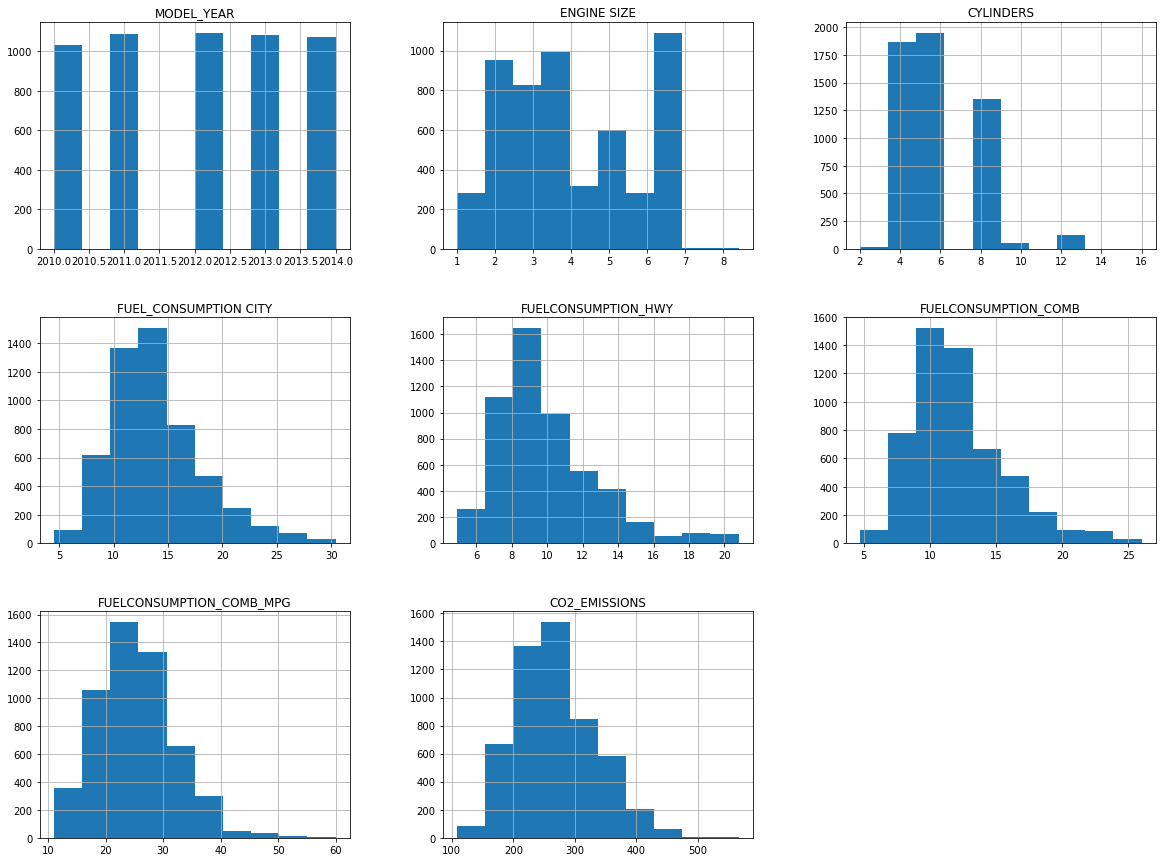

In [18]:
#plotting the distribution plots and correlations

plt.figure(dpi=200)
fuel_cons.hist(figsize = (20,15))
plt.show()


Text(0.5, 1.0, 'HeatMap Correlation')

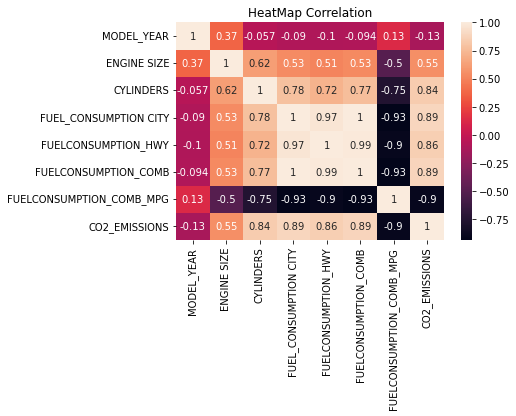

In [19]:
#Heatmap Correlation plot
sns.heatmap(fuel_cons.corr(), annot=True)
plt.title('HeatMap Correlation')

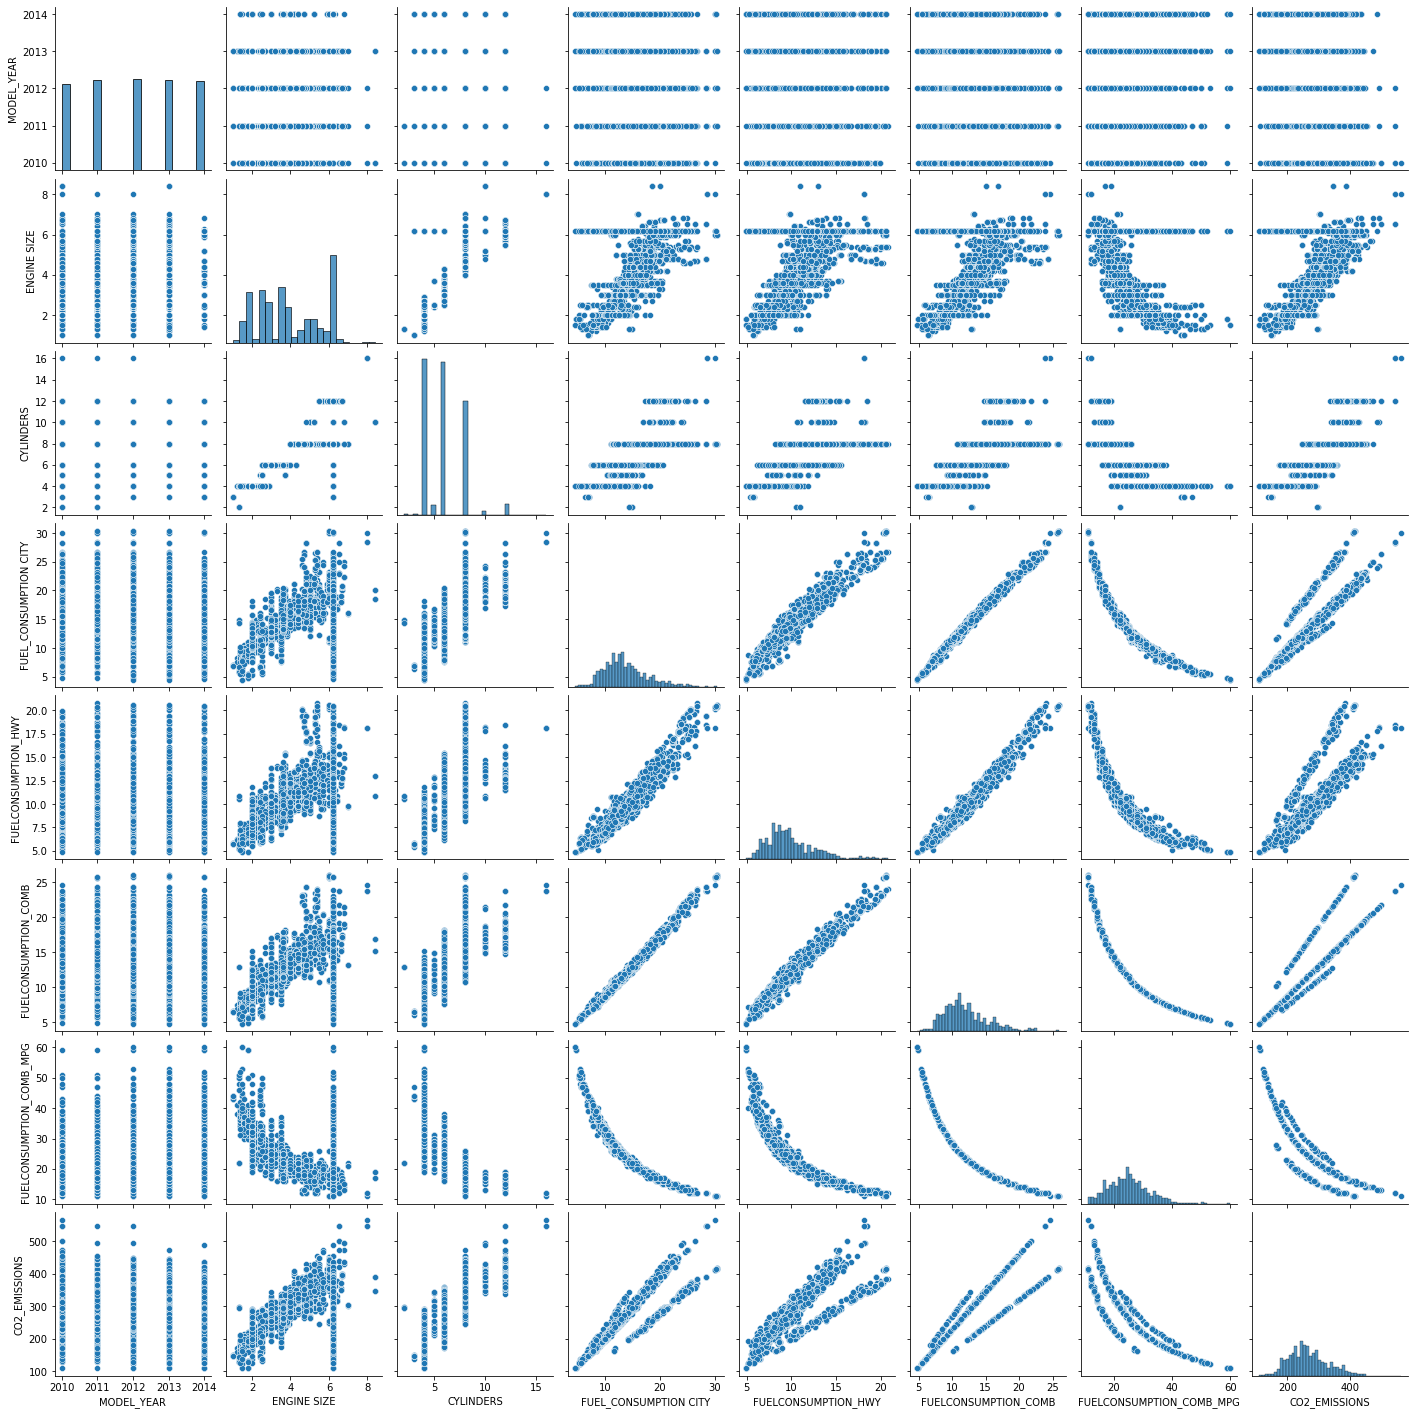

In [20]:
#Getting the plot
sns.pairplot(fuel_cons)


###### From the heatmap correlation plot, we could deduce that best subset is engine size and fuel consumption (mpg), hence we fit the model using Engine size and fuel consumption mile per gallon.

In [21]:
#Predcition 1
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train[['ENGINE SIZE', 'FUELCONSUMPTION_COMB']], y_train)

predictions_2 = lin_reg_model.predict(X_val[['ENGINE SIZE', 'FUELCONSUMPTION_COMB']])

print(f'The mean absolute error is {mean_absolute_error(y_val, predictions_2)} .')
print(f'The R2 Score is {r2_score(y_val, predictions_2)} .')

The mean absolute error is 19.917841164686212 .
The R2 Score is 0.7792241191463196 .


In [22]:
# Prediction 2
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train[['FUEL_CONSUMPTION CITY', 'FUELCONSUMPTION_HWY']], y_train)

predictions_2 = lin_reg_model.predict(X_val[['FUEL_CONSUMPTION CITY', 'FUELCONSUMPTION_HWY']])

print(f'The mean absolute error is {mean_absolute_error(y_val, predictions_2)} .')
print(f'The R2 Score is {r2_score(y_val, predictions_2)} .')

The mean absolute error is 19.412921808545754 .
The R2 Score is 0.785956583822764 .


In [23]:
# Prediction 3
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train[['CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']], y_train)

predictions_2 = lin_reg_model.predict(X_val[['CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])

print(f'The mean absolute error is {mean_absolute_error(y_val, predictions_2)} .')
print(f'The R2 Score is {r2_score(y_val, predictions_2)} .')

The mean absolute error is 15.749410934196748 .
The R2 Score is 0.8645214584319656 .


In [24]:
# Putting all the evaluation results in a table

# initialize the results of evaluation in a lists.
Evaluation_results = {'Mean Absolute Error': [19.91, 19.41, 15.74],'R2 Score': [0.78, 0.79, 0.86]}
 
# Creates pandas DataFrame.
x_predictors = pd.DataFrame(Evaluation_results, index=['Prediction 1',
                               'Prediction 2',
                               'Prediction 3'])

x_predictors

,Mean Absolute Error,R2 Score
Prediction 1,19.91,0.78
Prediction 2,19.41,0.79
Prediction 3,15.74,0.86


#### Ex. 3 Determine whether there were any noticeable improvements in the CO2 emission from year 2010 to year 2014? Explain your findings.
###### To detrmine the improvements, we look at the average emissions per year

In [25]:
# Checking emissions; it reduced from 2010 till 2014 
fuel_cons.groupby('MODEL_YEAR')['CO2_EMISSIONS'].mean()

MODEL_YEAR
2010    278.017476
2011    274.428571
2012    269.663611
2013    260.419593
2014    256.116713
Name: CO2_EMISSIONS, dtype: float64

<AxesSubplot:xlabel='MODEL_YEAR'>

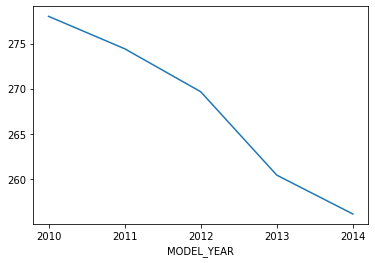

In [26]:
# Visualizing the average C02 emissions per year to determine the trend and drop in the emissions
fuel_cons.groupby('MODEL_YEAR')['CO2_EMISSIONS'].mean().plot(
    kind='line', xticks=[2010, 2011, 2012, 2013, 2014])

##### Judging from the plot and the mean table, it was determined that the CO2 emission reduced over the years. Smaller engine size contributed this reduction.

### Ex. 4 
#### Using each categorical variable as the target variable at each instance, determine which of the variables performed best in classifying the dataset. Explain your findings.

#### Performing classification on our models
###### Since our machine learning algorithms accepts only numerical features. Hence, the need to convert strings to numbers using One Hot Encoding.
###### One hot encoding converts each category to a column with 1 assigned to indicate the position of the data and 0 assigned to the rest of the

In [27]:
def encode(train_data, val_data):
    
    # Looking at categorical variables/dataframes
    cat_cols = [x for x in train_data.columns if train_data[x].dtype==object]
    
    # encoding using One Hot encoding
    encoder = OneHotEncoder(handle_unknown='ignore')
    train_cat_encoded = encoder.fit_transform(train_data[cat_cols]).toarray()
    val_cat_encoded = encoder.transform(val_data[cat_cols]).toarray()
    feature_names = encoder.get_feature_names_out()
    train_cat_encoded = pd.DataFrame(train_cat_encoded, columns=feature_names, 
                                   index=train_data.index)
    val_cat_encoded = pd.DataFrame(val_cat_encoded, columns=feature_names, 
                                 index=val_data.index)
    train_data_encoded = pd.concat([train_data, train_cat_encoded], axis=1)
    train_data_encoded.drop(cat_cols, axis=1, inplace=True)
    val_data_encoded = pd.concat([val_data, val_cat_encoded], axis=1)
    val_data_encoded.drop(cat_cols, axis=1, inplace=True)
    return train_data_encoded, val_data_encoded


##### Calssifying based on vehicle make dataframe

In [28]:
# feature matrix and target vector
X = fuel_cons.drop('MAKE', axis=1)
y = fuel_cons['MAKE']

# dropping the instance using a single sample
X.drop(5354, inplace=True)
y.drop(5354, inplace=True)

# classifying the numerical and categorical columns
cont_dataframe = [x for x in X.columns if X[x].dtype in [int, float]]
num_dataframe = [x for x in X.columns if X[x].dtype==object]

# split the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)

# scaling using minmaxscaler
scaler = MinMaxScaler()

#  fitting the scaler
X_train[cont_dataframe] = scaler.fit_transform(X_train[cont_dataframe])
X_val[cont_dataframe] = scaler.transform(X_val[cont_dataframe])

#  encode
X_train_encoded, X_val_encoded = encode(X_train, X_val)

# oversample
over_sampling = SMOTE(k_neighbors=1, random_state=20)

X_train_encoded, y_train = over_sampling.fit_resample(X_train_encoded, y_train)

#  calling the model
log_reg = LogisticRegression()

#  fit model
log_reg.fit(X_train_encoded, y_train)

#  make classifications
classif = log_reg.predict(X_val_encoded)

#  report
print(classification_report(y_val, classif))

               precision    recall  f1-score   support

        ACURA       0.07      0.18      0.11        11
   ALFA ROMEO       0.00      0.00      0.00         1
 ASTON MARTIN       0.25      0.38      0.30         8
         AUDI       0.18      0.06      0.09        36
      BENTLEY       0.17      0.14      0.15         7
          BMW       0.79      0.15      0.26        72
      BUGATTI       0.00      0.00      0.00         0
        BUICK       0.03      0.09      0.04        11
     CADILLAC       0.11      0.05      0.07        21
    CHEVROLET       0.10      0.01      0.02       105
     CHRYSLER       0.06      0.20      0.09        15
        DODGE       0.04      0.03      0.03        36
      FERRARI       0.00      0.00      0.00         1
         FIAT       0.04      1.00      0.08         2
         FORD       0.05      0.01      0.02        84
          GMC       0.22      0.24      0.23        54
        HONDA       0.00      0.00      0.00        24
       HU

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

##### Calssifying based on vehicle model year dataframe

In [29]:
# feature matrix and target vector
X = fuel_cons.drop('MODEL_YEAR', axis=1)
y = fuel_cons['MODEL_YEAR']

# classifying the numerical and categorical columns
cont_dataframe = [x for x in X.columns if X[x].dtype in [int, float]]
num_dataframe = [x for x in X.columns if X[x].dtype==object]

# split the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)

# scaling using minmaxscaler
scaler = MinMaxScaler()

#  fitting the scaler
X_train[cont_dataframe] = scaler.fit_transform(X_train[cont_dataframe])
X_val[cont_dataframe] = scaler.transform(X_val[cont_dataframe])

#  encode
X_train_encoded, X_val_encoded = encode(X_train, X_val)

# oversample
over_sampling = SMOTE(k_neighbors=1, random_state=20)

X_train_encoded, y_train = over_sampling.fit_resample(X_train_encoded, y_train)

#  calling the model
log_reg = LogisticRegression()

#  fit model
log_reg.fit(X_train_encoded, y_train)

#  make classifications
classif = log_reg.predict(X_val_encoded)

#  report
print(classification_report(y_val, classif))

              precision    recall  f1-score   support

        2010       0.31      0.40      0.35       206
        2011       0.25      0.21      0.23       207
        2012       0.22      0.15      0.18       217
        2013       0.37      0.46      0.41       206
        2014       0.76      0.74      0.75       236

    accuracy                           0.40      1072
   macro avg       0.38      0.39      0.38      1072
weighted avg       0.39      0.40      0.39      1072



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Calssifying based on vehicle class dataframe

In [30]:
# feature matrix and target vector
X = fuel_cons.drop('VEHICLE CLASS', axis=1)
y = fuel_cons['VEHICLE CLASS']

# classifying the numerical and categorical columns
cont_dataframe = [x for x in X.columns if X[x].dtype in [int, float]]
num_dataframe = [x for x in X.columns if X[x].dtype==object]

# split the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)

# scaling using minmaxscaler
scaler = MinMaxScaler()

#  fitting the scaler
X_train[cont_dataframe] = scaler.fit_transform(X_train[cont_dataframe])
X_val[cont_dataframe] = scaler.transform(X_val[cont_dataframe])

#  encode
X_train_encoded, X_val_encoded = encode(X_train, X_val)

# oversample
over_sampling = SMOTE(k_neighbors=1, random_state=20)

X_train_encoded, y_train = over_sampling.fit_resample(X_train_encoded, y_train)

#  calling the model
log_reg = LogisticRegression()

#  fit model
log_reg.fit(X_train_encoded, y_train)

#  make classifications
classif = log_reg.predict(X_val_encoded)

#  report
print(classification_report(y_val, classif))

                          precision    recall  f1-score   support

                 COMPACT       0.40      0.06      0.10       139
               FULL-SIZE       0.25      0.27      0.26        78
                MID-SIZE       0.17      0.03      0.05       132
             MINICOMPACT       0.33      0.33      0.33        55
                 MINIVAN       0.09      0.54      0.16        13
    PICKUP TRUCK - SMALL       0.25      0.68      0.36        40
 PICKUP TRUCK - STANDARD       0.28      0.14      0.19        71
 SPECIAL PURPOSE VEHICLE       0.14      0.88      0.24         8
STATION WAGON - MID-SIZE       0.00      0.00      0.00         3
   STATION WAGON - SMALL       0.12      0.73      0.21        52
              SUBCOMPACT       0.50      0.17      0.26       105
                     SUV       0.20      0.03      0.05       162
             SUV - SMALL       0.17      0.15      0.16        55
          SUV - STANDARD       0.04      0.02      0.03        44
         

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Calssifying based on vehicle transmission dataframe

In [31]:
# feature matrix and target vector
X = fuel_cons.drop('TRANSMISSION', axis=1)
y = fuel_cons['TRANSMISSION']

# classifying the numerical and categorical columns
cont_dataframe = [x for x in X.columns if X[x].dtype in [int, float]]
num_dataframe = [x for x in X.columns if X[x].dtype==object]

# split the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)

# scaling using minmaxscaler
scaler = MinMaxScaler()

#  fitting the scaler
X_train[cont_dataframe] = scaler.fit_transform(X_train[cont_dataframe])
X_val[cont_dataframe] = scaler.transform(X_val[cont_dataframe])

#  encode
X_train_encoded, X_val_encoded = encode(X_train, X_val)

# oversample
over_sampling = SMOTE(k_neighbors=1, random_state=20)

X_train_encoded, y_train = over_sampling.fit_resample(X_train_encoded, y_train)

#  calling the model
log_reg = LogisticRegression()

#  fit model
log_reg.fit(X_train_encoded, y_train)

#  make classifications
classif = log_reg.predict(X_val_encoded)

#  report
print(classification_report(y_val, classif))

              precision    recall  f1-score   support

          A4       0.38      0.22      0.28        89
          A5       0.08      0.46      0.13        37
          A6       0.44      0.18      0.26       202
          A7       0.13      0.11      0.12        18
          A8       0.03      0.02      0.03        41
          A9       0.00      0.00      0.00         1
         AM5       0.06      1.00      0.11         1
         AM6       0.00      0.00      0.00         5
         AM7       0.60      0.32      0.41        19
         AS4       0.19      0.60      0.29         5
         AS5       0.00      0.00      0.00        26
         AS6       0.33      0.10      0.15       211
         AS7       0.00      0.00      0.00        57
         AS8       0.34      0.23      0.28        43
         AS9       0.00      0.00      0.00         0
          AV       0.00      0.00      0.00        63
         AV6       0.04      0.83      0.08         6
         AV7       0.03    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

##### Calssifying based on fuel type dataframe

In [32]:
# feature matrix and target vector
X = fuel_cons.drop('FUEL', axis=1)
y = fuel_cons['FUEL']

# classifying the numerical and categorical columns
cont_dataframe = [x for x in X.columns if X[x].dtype in [int, float]]
num_dataframe = [x for x in X.columns if X[x].dtype==object]

# split the data into training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=70)

# scaling using minmaxscaler
scaler = MinMaxScaler()

#  fitting the scaler
X_train[cont_dataframe] = scaler.fit_transform(X_train[cont_dataframe])
X_val[cont_dataframe] = scaler.transform(X_val[cont_dataframe])

#  encode
X_train_encoded, X_val_encoded = encode(X_train, X_val)

# oversample
over_sampling = SMOTE(k_neighbors=1, random_state=20)

X_train_encoded, y_train = over_sampling.fit_resample(X_train_encoded, y_train)

#  calling the model
log_reg = LogisticRegression()

#  fit model
log_reg.fit(X_train_encoded, y_train)

#  make classifications
classif = log_reg.predict(X_val_encoded)

#  report
print(classification_report(y_val, classif))

              precision    recall  f1-score   support

           D       0.20      1.00      0.33        21
           E       1.00      1.00      1.00        97
           X       0.69      0.52      0.60       541
           Z       0.56      0.63      0.59       413

    accuracy                           0.62      1072
   macro avg       0.61      0.79      0.63      1072
weighted avg       0.66      0.62      0.63      1072



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
fuel_cons.groupby('FUEL')['CO2_EMISSIONS'].mean()

FUEL
D    239.500000
E    297.403326
X    252.905370
Z    280.610824
Name: CO2_EMISSIONS, dtype: float64

#### Based on the classification models, fuel type gives us the best classification of our dataset.

### EX 5: By splitting our dataset into training data and test it on the validation dataset using our validation score

## EX 6: State the performance measure(s) you were most interested in and the reason(s).
#### For regression models, Coefficient of determination is the performance measures I was more interested in as it give us the best score comparison especially on continous variables. On Classification, I was more interested in accuracy score because it gives the best measurement on discrete variables.

## EX 7: Can your models be deployed based on their performances? Explain.

#### The models can be deployed based on the ability to predict accurately the CO2 emissions and to classify the vehicles when applied on the validation set.

## EX 8: Use only the non-categorical variables to form groups. Using internal and external evaluation metrics, determine which categorical variable best describes the groups formed.

#### We will determine which non-categorical variables is the best.

In [34]:
#Defining the number of clusters using k = 4
cont_dataframe = fuel_cons[cont_dataframe]
scaler = StandardScaler()
scaled_cont_dataframe = scaler.fit_transform(cont_dataframe)
cluster_model = KMeans(n_clusters=4)

# labels
cluster_labels = cluster_model.fit_predict(scaled_cont_dataframe)

fuel_cons['CLUSTER'] = cluster_labels

In [35]:
fuel_cons.tail()

,MODEL_YEAR,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CLUSTER
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271,2
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,6.2,6,AS6,X,13.2,9.5,11.5,25,264,2
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,13.4,9.8,11.8,24,271,2
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,6.2,6,AS6,X,12.9,9.3,11.3,25,260,2
5358,2014,VOLVO,XC90 AWD,SUV - STANDARD,6.2,6,AS6,X,14.9,10.2,12.8,22,294,3


In [36]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(fuel_cons['FUEL'].values.reshape(-1, 1)).toarray()
feature_names = encoder.get_feature_names_out()
encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_cons['FUEL'].index)

davies_bouldin_score(encoded, fuel_cons['CLUSTER'])

8.45733872770084

In [37]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(fuel_cons['MAKE'].values.reshape(-1, 1)).toarray()
feature_names = encoder.get_feature_names_out()
encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_cons['MAKE'].index)

davies_bouldin_score(encoded, fuel_cons['CLUSTER'])

12.32638705851259

In [38]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(fuel_cons['MODEL_YEAR'].values.reshape(-1, 1)).toarray()
feature_names = encoder.get_feature_names_out()
encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_cons['MODEL_YEAR'].index)

davies_bouldin_score(encoded, fuel_cons['CLUSTER'])

15.030410796095463

In [39]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(fuel_cons['TRANSMISSION'].values.reshape(-1, 1)).toarray()
feature_names = encoder.get_feature_names_out()
encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_cons['TRANSMISSION'].index)

davies_bouldin_score(encoded, fuel_cons['CLUSTER'])

9.693722959463708

In [40]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(fuel_cons['VEHICLE CLASS'].values.reshape(-1, 1)).toarray()
feature_names = encoder.get_feature_names_out()
encoded = pd.DataFrame(encoded, columns=feature_names, index=fuel_cons['VEHICLE CLASS'].index)

davies_bouldin_score(encoded, fuel_cons['CLUSTER'])

7.733133808243581

##### Based on our evaluation set, the optimal value indicates that, based on the Davies-Bouldin criterion, the Vehicle type gives us the best clusters.